In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [2]:
d=pd.read_csv('train.csv',sep=',',encoding='latin')

In [3]:
d.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
d.drop(columns=['keyword','location'],inplace=True)

In [5]:
d.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
d.shape

(7613, 3)

In [7]:
import keras
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [8]:
x=d['text']
y=d['target']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

# Cleaning the data

In [12]:
def Tokenizer(string):
    words=nltk.word_tokenize(string)
    return ' '.join(words)

def Removestopwords(string):
    for i in punctuation:
        string=string.replace(i,'')
    eng_stop=stopwords.words('english')
    words=nltk.word_tokenize(string)
    k=[]
    for each in words:
        if each not in eng_stop:
            k.append(each.lower())
    return ' '.join(k)

def Lammetization(string):
    words=nltk.word_tokenize(string)
    ws=WordNetLemmatizer()
    l=[]
    for each in words:
        l.append(ws.lemmatize(each))
    return ' '.join(l)
            

In [13]:
def Refine(string):
    return Lammetization(Removestopwords(Tokenizer(string)))

In [14]:
d['Processed']=d['text'].apply(lambda x: Refine(x))

In [15]:
d.head()

,id,text,target,Processed
0,1,Our Deeds are the Reason of this #earthquake M...,1,our deed reason earthquake may allah forgive u
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,all resident asked shelter place notified offi...
3,6,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,just got sent photo ruby alaska smoke wildfire...


In [16]:
x=d['Processed']
y=d['target']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [18]:
x_train

2345    general news âãâ¢ã¥ãdemolition house waterw...
6112    in eye i see hope i knew i sinking i sinking a...
5764    without ally near ca nt use skill how get hire...
3591    11yearold boy charged with manslaughter toddle...
1175    2 injured 1 missing bridge collapse central me...
                              ...                        
79                pastor scene accident owner range rover
3927    85v265v 10w led warm white light motion sensor...
5955    screaming mariahcarey arianagrande http tcoxxz...
6936    charlieputh song cool beat like nothing but tr...
5640    kristindavis un refugee thank un refugee helpi...
Name: Processed, Length: 5329, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv=CountVectorizer(max_features=1000,ngram_range=(1,1),max_df=0.3,min_df=2)

In [21]:
x_train=cv.fit_transform(x_train)
x_test=cv.transform(x_test)

In [22]:
y_train

2345    0
6112    0
5764    0
3591    1
1175    1
       ..
79      1
3927    0
5955    0
6936    0
5640    0
Name: target, Length: 5329, dtype: int64

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [26]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(1000,)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Model Training

In [27]:
model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))

Train on 5329 samples, validate on 2284 samples
Epoch 1/20
5329/5329 [==============================] - 1s 124us/step - loss: 0.6004 - accuracy: 0.7191 - val_loss: 0.4985 - val_accuracy: 0.7815
Epoch 2/20
5329/5329 [==============================] - 0s 91us/step - loss: 0.4378 - accuracy: 0.8144 - val_loss: 0.4495 - val_accuracy: 0.7942
Epoch 3/20
5329/5329 [==============================] - 0s 91us/step - loss: 0.3802 - accuracy: 0.8386 - val_loss: 0.4475 - val_accuracy: 0.7960
Epoch 4/20
5329/5329 [==============================] - 1s 109us/step - loss: 0.3450 - accuracy: 0.8516 - val_loss: 0.4537 - val_accuracy: 0.7920
Epoch 5/20
5329/5329 [==============================] - 0s 88us/step - loss: 0.3223 - accuracy: 0.8666 - val_loss: 0.4667 - val_accuracy: 0.7920
Epoch 6/20
5329/5329 [==============================] - 0s 88us/step - loss: 0.2978 - accuracy: 0.8765 - val_loss: 0.4782 - val_accuracy: 0.7872
Epoch 7/20
5329/5329 [==============================] - 0s 88us/step - loss: 0.2

In [28]:
results=pd.DataFrame(model.history.history)

# Final Result

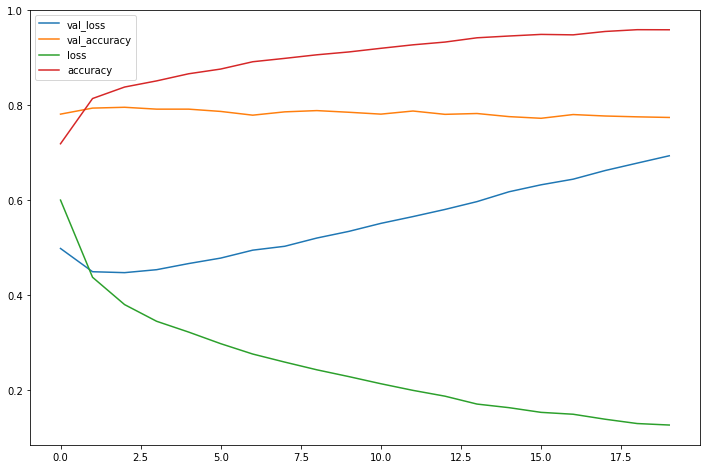

In [32]:
results.plot(legend=True,figsize=(12,8))